# XGBOOST REGRESSOR

##1.1 Import Data

In [ ]:
!pip install xgboost

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Indonesia AI/train.csv')

In [ ]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## 1.2 EDA

In [ ]:
# Set the 'id' column as the index
df = df.set_index('Id')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

In [ ]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


<Axes: ylabel='Id'>

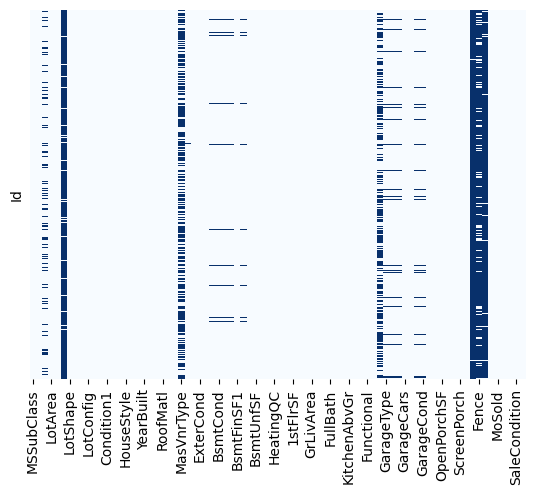

In [ ]:
# cek apakah ada nilai Null
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [ ]:
#non_numeric = ['Alley','MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Electrical','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PoolQC','Fence','MiscFeature']
#numeric = ['LotFrontage','MasVnrArea','GarageYrBlt','GarageCars','GarageArea']

## 1.3 INPUT NULL VALUE

In [ ]:
df['Alley'] = df['Alley'].apply(lambda x: 'NoAccess' if x is np.nan else x)
df['MasVnrType'] = df['MasVnrType'].apply(lambda x: 'None' if x is np.nan else x)
df['BsmtQual'] = df['BsmtQual'].apply(lambda x: 'NB' if x is np.nan else x) #NB = No Basement
df['BsmtCond'] = df['BsmtCond'].apply(lambda x: 'NB' if x is np.nan else x) #NB = No Basement
df['BsmtExposure'] = df['BsmtExposure'].apply(lambda x: 'NB' if x is np.nan else x) #NB = No Basement
df['BsmtFinType1'] = df['BsmtFinType1'].apply(lambda x: 'NB' if x is np.nan else x) #NB = No Basement
df['BsmtFinType2'] = df['BsmtFinType2'].apply(lambda x: 'NB' if x is np.nan else x) #NB = No Basement
df['FireplaceQu'] = df['FireplaceQu'].apply(lambda x: 'NF' if x is np.nan else x) #NB = No Fireplace
df['GarageType'] = df['GarageType'].apply(lambda x: 'NG' if x is np.nan else x) #NB = No Garage
df['GarageFinish'] = df['GarageFinish'].apply(lambda x: 'NG' if x is np.nan else x) #NB = No Garage
df['GarageQual'] = df['GarageQual'].apply(lambda x: 'NG' if x is np.nan else x) #NB = No Garage
df['GarageCond'] = df['GarageCond'].apply(lambda x: 'NG' if x is np.nan else x) #NB = No Garage
df['GarageYrBlt'] = df['GarageYrBlt'].apply(lambda x: '0' if x is np.nan else x) #NB = No Garage
df['PoolQC'] = df['PoolQC'].apply(lambda x: 'NP' if x is np.nan else x) #NB = No Pool
df['Fence'] = df['Fence'].apply(lambda x: 'NF' if x is np.nan else x) #NB = No Fence
df['MiscFeature'] = df['MiscFeature'].apply(lambda x: 'NMF' if x is np.nan else x)
df['Electrical'] = df['Electrical'].apply(lambda x: 'SBrkr' if x is np.nan else x)
df['LotFrontage'].fillna(70.049958, inplace=True)
df['GarageYrBlt'].fillna(0, inplace=True)
df['MasVnrArea'].fillna(0, inplace=True)

<ipython-input-49-dca13d3dcfc0>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['LotFrontage'].fillna(70.049958, inplace=True)
<ipython-input-49-dca13d3dcfc0>:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

<Axes: ylabel='Id'>

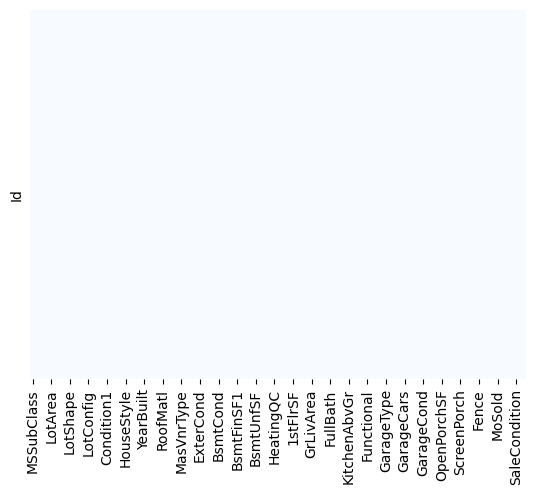

In [ ]:
# cek apakah ada nilai Null
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

In [ ]:
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Apply one-hot encoding and remove the original columns
df_encoded = pd.get_dummies(df, columns=categorical_columns)

# Display the encoded DataFrame without original columns
df_encoded.head()


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,False,False,False,True,False,False,False,False,True,False
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,False,False,False,True,False,False,False,False,True,False
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,False,False,False,True,False,False,False,False,True,False
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,False,False,False,True,True,False,False,False,False,False
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,False,False,False,True,False,False,False,False,True,False


In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Columns: 303 entries, MSSubClass to SaleCondition_Partial
dtypes: bool(266), float64(3), int64(34)
memory usage: 812.7 KB


In [ ]:
# Buat data latih dan uji

X = df_encoded.drop(columns = ['SalePrice'])
y = df_encoded[['SalePrice']]


In [ ]:
X

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,False,False,False,True,False,False,False,False,True,False
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,False,False,False,True,False,False,False,False,True,False
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,False,False,False,True,False,False,False,False,True,False
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,False,False,False,True,True,False,False,False,False,False
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,False,False,False,True,False,False,False,False,True,False
1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,False,False,False,True,False,False,False,False,True,False
1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,False,False,False,True,False,False,False,False,True,False


In [ ]:
y

,SalePrice
Id,
1,208500
2,181500
3,223500
4,140000
5,250000
...,...
1456,175000
1457,210000
1458,266500


In [ ]:
X.shape

(1460, 302)

In [ ]:
y.shape

(1460, 1)

In [ ]:
# Konversi tipe data ke float32

X = np.array(X).astype('float32')
y = np.array(y).astype('float32')

In [ ]:
# Hanya ambil variabel numerik dan terapkan penskalaan
X

array([[6.000e+01, 6.500e+01, 8.450e+03, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [2.000e+01, 8.000e+01, 9.600e+03, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [6.000e+01, 6.800e+01, 1.125e+04, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       ...,
       [7.000e+01, 6.600e+01, 9.042e+03, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [2.000e+01, 6.800e+01, 9.717e+03, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [2.000e+01, 7.500e+01, 9.937e+03, ..., 0.000e+00, 1.000e+00,
        0.000e+00]], dtype=float32)

In [ ]:
# bagi data menjadi Uji dan Latih
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
from sklearn.metrics import mean_squared_error, accuracy_score

In [ ]:
# latih model regresi xgboost

import xgboost as xgb
model = xgb.XGBRegressor(objective ='reg:squarederror', learning_rate = 0.1, max_depth = 30, n_estimators = 100)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=30, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
model_r2 = model.score(X_test, y_test)
model_r2

0.9029815196990967

In [ ]:
# lakukan prediksi

y_predict = model.predict(X_test)
y_predict

array([253821.23 , 124828.95 , 265752.8  , 166500.84 , 149486.92 ,
       204371.5  ,  88845.055, 172984.55 , 264251.38 ,  79587.33 ,
       286170.84 , 120481.86 , 132172.62 , 142872.88 ,  88204.95 ,
       130938.25 , 327631.8  , 176415.88 , 139078.86 , 232675.55 ,
       277678.78 , 158646.42 , 152785.39 , 140987.58 , 124826.79 ,
        97882.586, 210556.38 , 256306.7  , 224343.67 , 215292.42 ,
       153897.3  , 171547.45 , 333686.88 , 193126.19 , 190446.38 ,
       118084.52 , 205656.11 , 183619.44 , 107254.69 , 208771.16 ,
       200729.14 , 278128.16 , 103745.445, 133369.17 , 263280.84 ,
       371035.1  , 313653.34 , 179201.27 , 188978.33 , 212857.6  ,
       122877.11 , 136804.84 , 143710.38 , 258575.33 , 155619.84 ,
       124046.67 , 129637.26 , 313792.16 , 176220.39 , 125035.31 ,
       131010.24 , 149537.7  , 111921.805, 362616.66 , 176868.27 ,
       156696.55 , 187167.88 , 131598.28 , 197684.34 , 122484.875,
       278359.72 , 365451.62 , 178439.88 , 139519.67 , 183589.

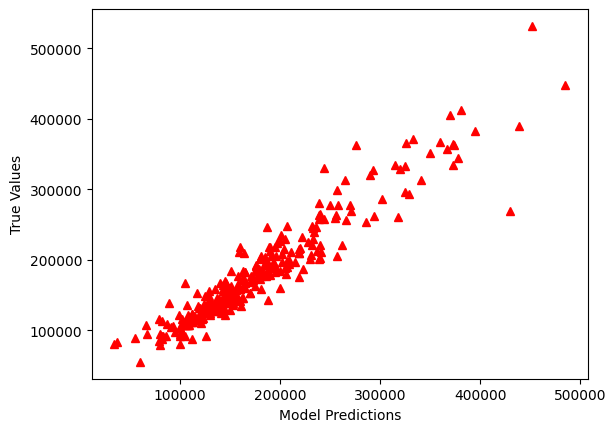

In [ ]:
# Plot hasil yang sudah dikenakan penskalaan

plt.plot(y_test, y_predict, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')
plt.show()

In [ ]:
# Plot metrik pengujian

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

k = X_test.shape[1]
n = len(X_test)
RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)),'.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2)

RMSE = 23574.021 
MSE = 555734500.0 
MAE = 15924.144 
R2 = 0.9029815196990967 
Adjusted R2 = 3.5665797970511695


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

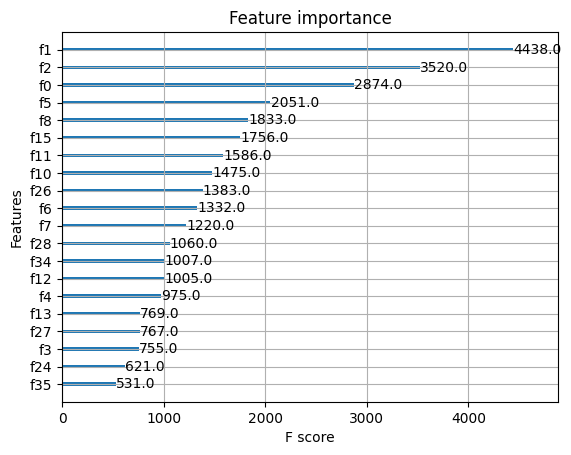

In [ ]:
#plot importances
xgb.plot_importance(model, max_num_features = 20)

In [ ]:
# Initialize the regressor
#regressor = XGBRegressor(objective="reg:squarederror")

# Define the parameter grid for tuning
#param_grid = {
#    "n_estimators": [50, 100, 200],
#    "max_depth": [3, 5, 7],
#    "learning_rate": [0.01, 0.1, 0.2],
#    "subsample": [0.6, 0.8, 1.0],
#    "colsample_bytree": [0.6, 0.8, 1.0],
#    "gamma": [0, 0.1, 0.2]
#}

# Set up the GridSearchCV
#grid_search = GridSearchCV(estimator=regressor,
#                           param_grid=param_grid,
#                           scoring="r2",  # or "r2" for regression
#                           n_jobs=6,
#                           cv=5,  # 5-fold cross-validation
#                           verbose=2)

# Fit the GridSearchCV to find the best parameters
#grid_search.fit(X_train, y_train)

# Display best parameters and best score
#print("Best Parameters:", grid_search.best_params_)
#print("Best Score:", grid_search.best_score_)
#grid_search.best_params_, grid_search.best_score_

Fitting 5 folds for each of 729 candidates, totalling 3645 fits
({'colsample_bytree': 0.8,
  'gamma': 0,
  'learning_rate': 0.2,
  'max_depth': 3,
  'n_estimators': 200,
  'subsample': 0.6},
 0.8784943222999573)

In [ ]:
model2 = xgb.XGBRegressor(objective ='reg:squarederror', learning_rate = 0.2, max_depth = 3, n_estimators = 200,gamma = 0,subsample = 0.6, colsample_bytree=0.8)
model2.fit(X_train, y_train)
model_r22 = model2.score(X_test, y_test)
model_r22
y_predict2 = model2.predict(X_test)
y_predict2

array([269329.88 , 113752.37 , 253601.56 , 147632.14 , 162741.27 ,
       196854.44 ,  67999.02 , 169185.9  , 264367.7  ,  75820.02 ,
       286551.6  , 124046.19 , 130938.   , 156951.4  ,  84614.68 ,
       132864.83 , 328931.72 , 172490.4  , 143382.38 , 233724.58 ,
       277684.06 , 146946.47 , 156698.   , 142408.9  , 118184.91 ,
        88626.01 , 210870.22 , 275330.47 , 216363.94 , 227999.77 ,
       132895.77 , 164110.62 , 345692.78 , 184521.97 , 199957.   ,
       104049.59 , 192461.72 , 185462.67 , 113036.555, 212014.89 ,
       248425.5  , 252130.66 , 110738.586, 132289.53 , 258384.7  ,
       396330.75 , 306613.2  , 198019.08 , 198260.42 , 226058.44 ,
       124021.04 , 136466.36 , 138764.12 , 238639.88 , 149611.14 ,
       113395.93 , 122514.59 , 353110.72 , 210093.56 ,  68452.586,
       128238.48 , 161030.19 , 113657.21 , 360219.62 , 171989.69 ,
       122576.54 , 180951.06 , 131211.66 , 225916.94 , 107223.3  ,
       256514.2  , 355304.25 , 194186.77 , 145176.05 , 180172.

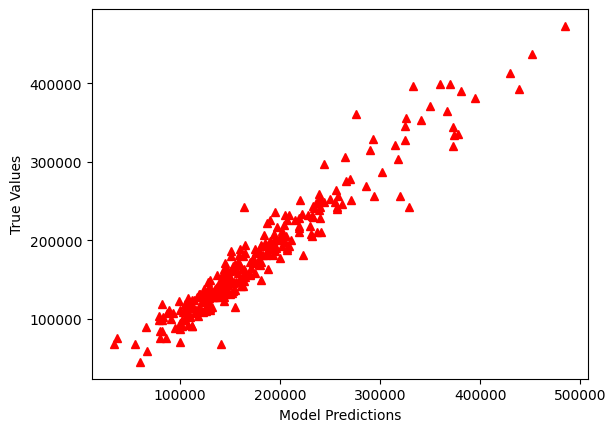

In [ ]:
plt.plot(y_test, y_predict2, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')
plt.show()

In [ ]:
# Plot metrik pengujian

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

k = X_test.shape[1]
n = len(X_test)
RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict2)),'.3f'))
MSE = mean_squared_error(y_test, y_predict2)
MAE = mean_absolute_error(y_test, y_predict2)
r2 = r2_score(y_test, y_predict2)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2)

RMSE = 19438.764 
MSE = 377865570.0 
MAE = 13934.45 
R2 = 0.9340333342552185 
Adjusted R2 = 2.7451181574301287


In [ ]:
from sklearn.svm import SVR

In [ ]:
# Membuat model SVR
svr = SVR(kernel='rbf', C=1.0, epsilon=0.2)

# Melatih model pada data pelatihan
svr.fit(X_train, y_train)

# Memprediksi pada data uji
y_predict3 = svr.predict(X_test)

# Menghitung Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_predict3)
print(f"Mean Squared Error: {mse}")

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Squared Error: 5879989724.456878


In [ ]:
# Plot metrik pengujian

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

k = X_test.shape[1]
n = len(X_test)
RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict3)),'.3f'))
MSE = mean_squared_error(y_test, y_predict3)
MAE = mean_absolute_error(y_test, y_predict3)
r2 = r2_score(y_test, y_predict3)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2)

RMSE = 76681.091 
MSE = 5879989724.456878 
MAE = 55048.02728110719 
R2 = -0.026511244663566913 
Adjusted R2 = 28.155888381554362


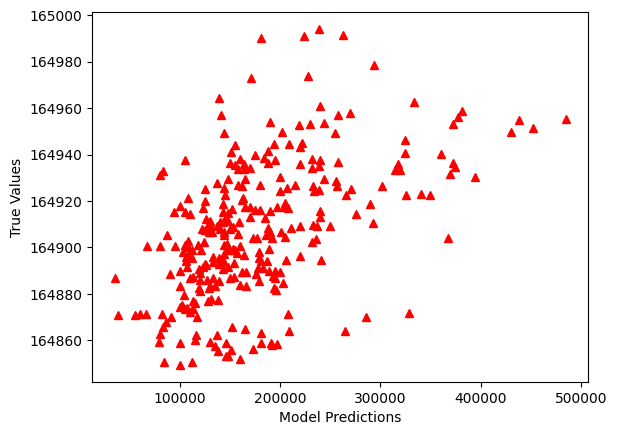

In [ ]:
plt.plot(y_test, y_predict3, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')
plt.show()

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

# Initialize the SVR regressor
regressor2 = SVR()

# Define the parameter grid for tuning
param_grid = {
    "kernel": ["linear", "poly", "rbf", "sigmoid"],  # different kernels
    "C": [0.1, 1, 10, 100],  # regularization parameter
    "epsilon": [0.01, 0.1, 0.2, 0.5],  # epsilon in the epsilon-SVR model
    "gamma": ["scale", "auto"]  # kernel coefficient for 'rbf', 'poly' and 'sigmoid'
}

# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=regressor2,
                           param_grid=param_grid,
                           scoring="r2",  # R-squared is common for regression
                           n_jobs=6,
                           cv=5,  # 5-fold cross-validation
                           verbose=2)

# Fit the GridSearchCV to find the best parameters
grid_search.fit(X_train, y_train)

# Display best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)
grid_search.best_params_, grid_search.best_score_

Fitting 5 folds for each of 128 candidates, totalling 640 fits


KeyboardInterrupt: 